In [15]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import numpy as np

# Загрузка набора данных
df = pd.read_csv("baskets.csv", header=None, encoding='cp1251')

# Инициализация пустого списка для хранения списков транзакций
transactions = []

# Проходим по каждой строке и разбиваем ее на список товаров
for row in df[0]:
    items = row.split(',')
    items = [item.strip() for item in items]  # Удаление пробелов
    transactions.append(items)

# Поиск уникальных товаров
unique_items = set(item for sublist in transactions for item in sublist)

# Создание булевой матрицы для Apriori
apriori_input = np.zeros((len(transactions), len(unique_items)), dtype=bool)

# Заполнение булевой матрицы
for i, transaction in enumerate(transactions):
    for item in transaction:
        j = list(unique_items).index(item)
        apriori_input[i, j] = True

In [16]:
sup_levels = [0.01, 0.03, 0.05, 0.1, 0.15]
_times = []
freqs = []
for sl in tqdm(sup_levels):
    # Поиск частых наборов с использованием алгоритма Apriori
    start_time = time()
    frequent_itemsets = apriori(pd.DataFrame(apriori_input), min_support=sl, use_colnames=False)
    end_time = time() - start_time
    _times.append(end_time)
    # Вывод результата
    freqs.append(frequent_itemsets)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 227.39it/s]


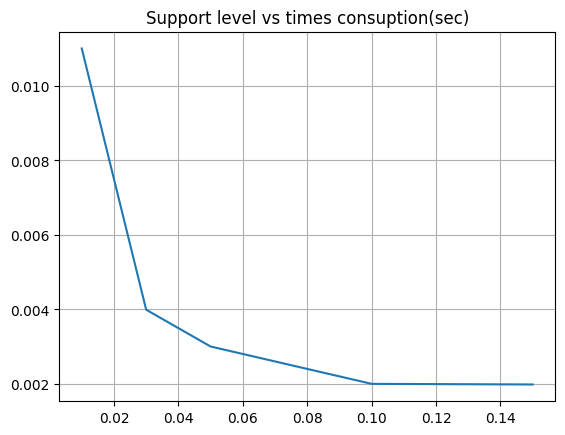

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.grid()
plt.title("Support level vs times consuption(sec)")
plt.plot(sup_levels, _times)

{1: 24}
{1: 12}
{1: 4}
{}
{}


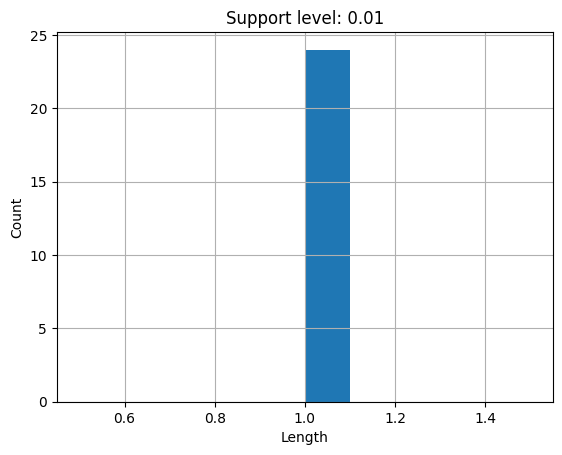

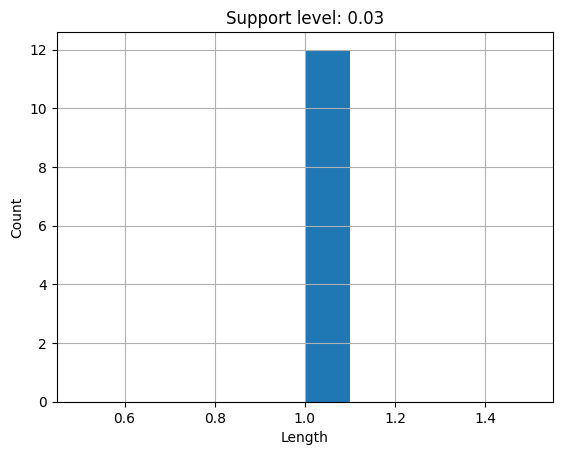

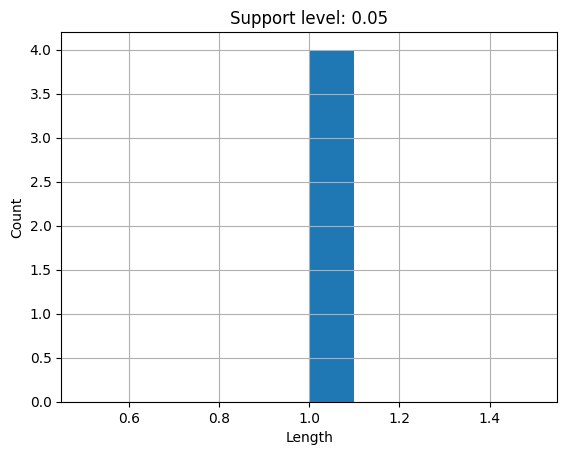

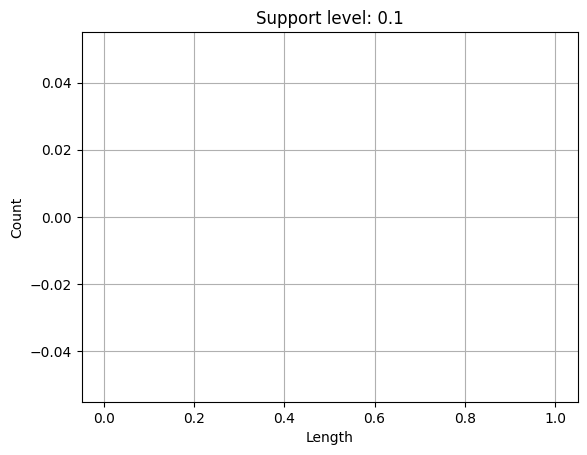

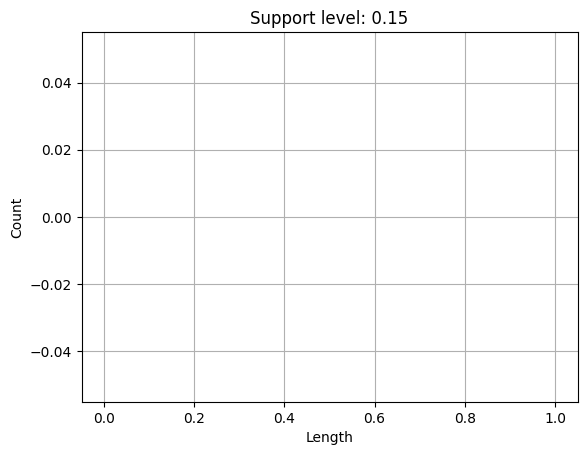

In [19]:
for i, sl in enumerate(sup_levels):
    lengths = {}
    for i in freqs[i].itemsets:
        l = len(i)
        if l not in lengths.keys():
            lengths[l] = 0
        lengths[l] += 1
    print(lengths)
    
    x = []
    for k,v in lengths.items():
        x = x + [k] * v
        
    plt.figure()
    plt.hist(x)
    plt.grid()
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.title(f"Support level: {sl}")
    